Імпортуємо модулі та дані з датасетів:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data_test = pd.read_csv("test.csv")
data_train = pd.read_csv("train.csv")
data = data_train.append(data_test)

Виведемо розмір даних і "head" таблиці для загального розуміння їх природи:

In [2]:
print(f"Розмір даних train датасету: {data_train.shape}")
print(f"Розмір даних test датасету: {data_test.shape}")

print ('Перші 5 рядків train датасету:') 
data_train.head ()

Розмір даних train датасету: (891, 12)
Розмір даних test датасету: (418, 11)
Перші 5 рядків train датасету:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print ('Перші 5 рядків test датасету:')
data_test.head ()

Перші 5 рядків test датасету:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Перевірка на нульові значення (у %):

In [4]:
print ('Для train датасету:')
print(data_train.isnull().sum().sort_values(ascending = False)/len(data)*100)

Для train датасету:
Cabin          52.482811
Age            13.521772
Embarked        0.152788
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64


In [5]:
print ('Для test датасету:')
print(data_test.isnull().sum().sort_values(ascending = False)/len(data)*100)

Для test датасету:
Cabin          24.980901
Age             6.569901
Fare            0.076394
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64


Перевірка на дублікати:

In [6]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Як бачимо, повторів немає.

Обробка відсутніх даних:

In [7]:
features = ["Age","Embarked","Pclass","Sex","SibSp","Parch","Fare","Name","Ticket"]
y = data_train["Survived"]
reduced_data_train = data_train[features]
reduced_data_test = data_test[features]

In [8]:
reduced_data_train[["Age"]] = reduced_data_train[["Age"]].fillna(value=reduced_data_train[["Age"]].mean())
print(reduced_data_train[["Embarked"]].mode())
reduced_data_train[["Embarked"]] = reduced_data_train[["Embarked"]].fillna(value="S")

reduced_data_test[["Age","Fare"]] = reduced_data_test[["Age","Fare"]].fillna(value=reduced_data_test[["Age","Fare"]].mean())

  Embarked
0        S


Результат обробки відсутніх даних:

In [9]:
print(reduced_data_train.isnull().sum().sort_values(ascending = False)/len(data)*100)

Age         0.0
Embarked    0.0
Pclass      0.0
Sex         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Name        0.0
Ticket      0.0
dtype: float64


In [10]:
print(reduced_data_test.isnull().sum().sort_values(ascending = False)/len(data)*100)

Age         0.0
Embarked    0.0
Pclass      0.0
Sex         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Name        0.0
Ticket      0.0
dtype: float64


Знайдемо категоріальні дані:

In [11]:
print ('Типи даних у train датасеті:')
reduced_data_train.dtypes

Типи даних у train датасеті:


Age         float64
Embarked     object
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Name         object
Ticket       object
dtype: object

In [12]:
print ("Кількість унікальних значень об'єктів у train датасеті:")
reduced_data_train.select_dtypes(include = [object]).apply(pd.Series.nunique, axis = 0)

Кількість унікальних значень об'єктів у train датасеті:


Embarked      3
Sex           2
Name        891
Ticket      681
dtype: int64

In [13]:
print ("Кількість унікальних значень об'єктів у test датасеті:")
reduced_data_test.select_dtypes(include = [object]).apply(pd.Series.nunique, axis = 0)

Кількість унікальних значень об'єктів у test датасеті:


Embarked      3
Sex           2
Name        418
Ticket      363
dtype: int64

Метод для виділення префіксів у значеннях Name (можливо, вони будуть важливі):

In [14]:
titles_list = { 
    "Capt": "Сrew", "Col": "Сrew", "Major": "Сrew", "Jonkheer": "VIP", "Don": "VIP", "Sir" : "VIP",
    "Dr": "Сrew", "Rev": "Сrew", "the Countess":"VIP", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs",
    "Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss", "Master" : "Master", "Lady" : "VIP"
}  # список відповідностей взятий з відкритого ресурсу

def get_titles(combined):
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    combined['Title'] = combined.Title.map(titles_list)
    return combined

In [15]:
reduced_data_train = get_titles(reduced_data_train)
reduced_data_test = get_titles(reduced_data_test)
del reduced_data_train['Name']
del reduced_data_test['Name']

print("Оновлений test датасет після спрощень:")
reduced_data_test.head()

Оновлений test датасет після спрощень:


,Age,Embarked,Pclass,Sex,SibSp,Parch,Fare,Ticket,Title
0,34.5,Q,3,male,0,0,7.8292,330911,Mr
1,47.0,S,3,female,1,0,7.0000,363272,Mrs
2,62.0,Q,2,male,0,0,9.6875,240276,Mr
3,27.0,S,3,male,0,0,8.6625,315154,Mr
4,22.0,S,3,female,1,1,12.2875,3101298,Mrs


Закодуємо категоріальні змінні:

In [16]:
reduced_data_train["Embarked"] = reduced_data_train["Embarked"].astype('category').cat.codes  # label encoding
reduced_data_test["Embarked"] = reduced_data_test["Embarked"].astype('category').cat.codes
reduced_data_train["Ticket"] = reduced_data_train["Ticket"].astype('category').cat.codes
reduced_data_test["Ticket"] = reduced_data_test["Ticket"].astype('category').cat.codes
reduced_data_train = pd.get_dummies(reduced_data_train)  # one hot encoding
reduced_data_test = pd.get_dummies(reduced_data_test)

print ("Train датасет після кодування змінних:")
reduced_data_train.head()

Train датасет після кодування змінних:


,Age,Embarked,Pclass,SibSp,Parch,Fare,Ticket,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_VIP,Title_Сrew
0,22.0,2,3,1,0,7.2500,523,0,1,0,0,1,0,0,0
1,38.0,0,1,1,0,71.2833,596,1,0,0,0,0,1,0,0
2,26.0,2,3,0,0,7.9250,669,1,0,0,1,0,0,0,0
3,35.0,2,1,1,0,53.1000,49,1,0,0,0,0,1,0,0
4,35.0,2,3,0,0,8.0500,472,0,1,0,0,1,0,0,0


In [17]:
X = reduced_data_train

t-SNE і k-means:

<Figure size 864x864 with 0 Axes>

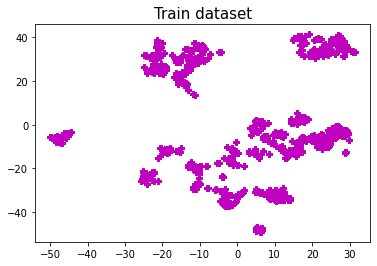

<Figure size 864x864 with 0 Axes>

In [18]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)

tsne = TSNE(random_state = 17)
tsne_representation = tsne.fit_transform(train_scaled)

plt.title('Train dataset', fontsize = 15)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c = 'm', marker = "P")
plt.figure(figsize = (12, 12))

In [19]:
X = tsne_representation.astype(float)

In [20]:
def kmeans_cluster(max_it, n_in, tolerance):
  kmeans = KMeans(algorithm = 'auto', copy_x = True, init = 'k-means++', max_iter = max_it,
    n_clusters = 2, n_init = n_in, random_state = None, tol = tolerance, verbose = 0)
  kmeans.fit(X)
  return kmeans.labels_

Візуалізація результатів роботи моделі для різних вхідних параметрів:


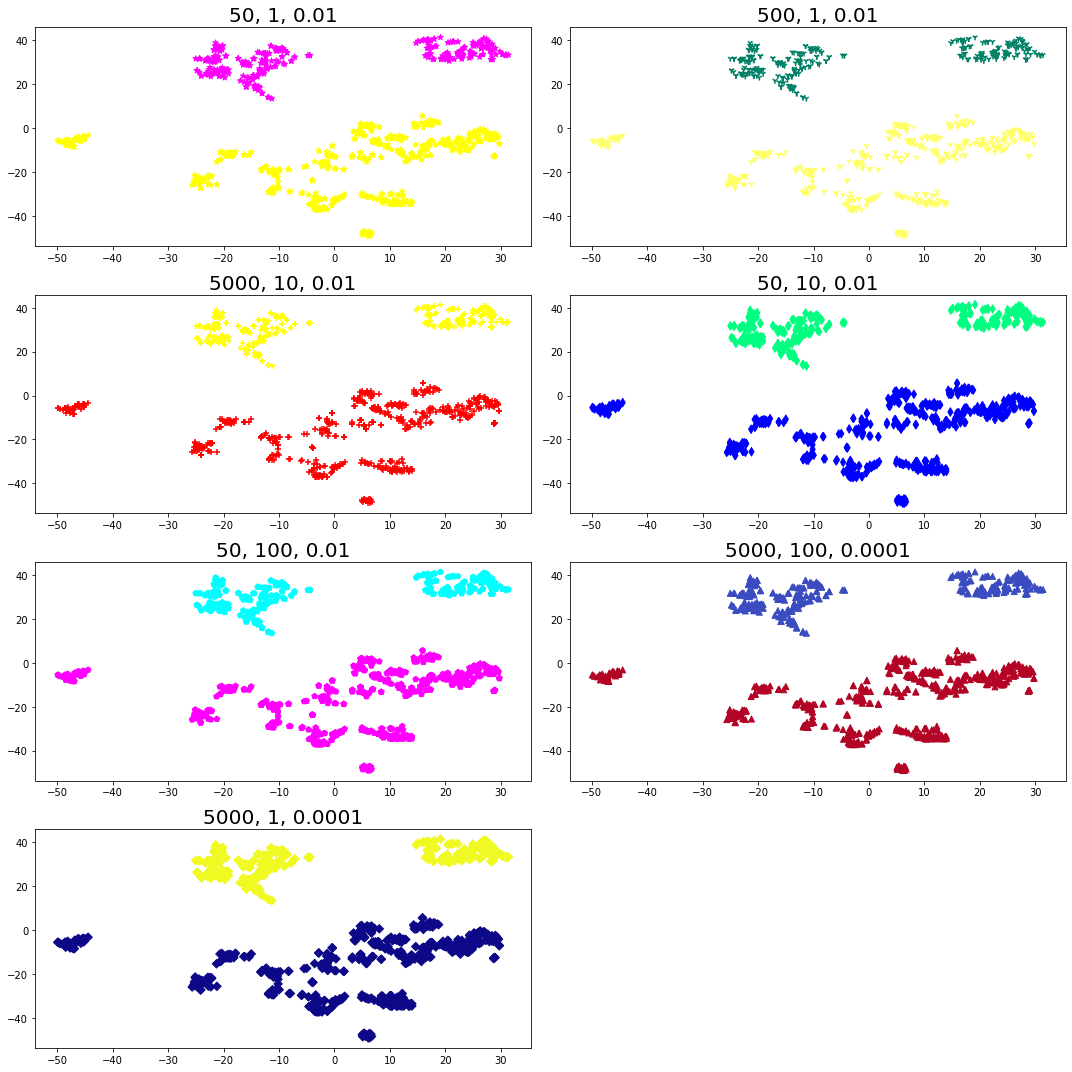

In [21]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(4, 2, 1)
print ("Візуалізація результатів роботи моделі для різних вхідних параметрів:")
result = kmeans_cluster(50, 1, 0.01)
plt.title('50, 1, 0.01', fontsize = 20)
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'spring', marker = "*")   # пограємось з параметрами графіків :D
plt.subplot(4, 2, 2)
result = kmeans_cluster(500, 1, 0.01)
plt.title('500, 1, 0.01', fontsize = 20)
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'summer', marker = "1")
plt.subplot(4, 2, 3)
result = kmeans_cluster(5000, 1, 0.01)
plt.title('5000, 10, 0.01', fontsize = 20)
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'autumn', marker = "+")
plt.subplot(4, 2, 4)
plt.title('50, 10, 0.01', fontsize = 20)
result = kmeans_cluster(50, 10, 0.01)
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'winter', marker = "d")
plt.subplot(4, 2, 5)
plt.title('50, 100, 0.01', fontsize = 20)
result = kmeans_cluster(50, 100, 0.01)
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'cool', marker = "p")
plt.subplot(4, 2, 6)
plt.title('5000, 100, 0.0001', fontsize = 20)
result = kmeans_cluster(5000, 100, 0.0001)
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'coolwarm', marker = "^")
plt.subplot(4, 2, 7)
plt.title('5000, 1, 0.0001', fontsize = 20)
result = kmeans_cluster(5000, 1, 0.0001)
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'plasma', marker = "D")
fig.tight_layout()

plt.show()

t-SNE та hierarchical clustering:

<Figure size 864x864 with 0 Axes>

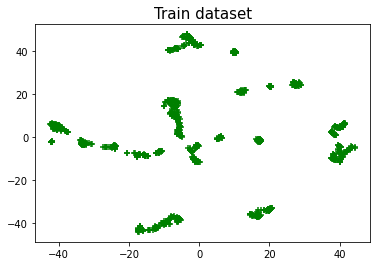

<Figure size 864x864 with 0 Axes>

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

train_full = X[:]
train_full = np.column_stack([train_full, y])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_full)

tsne = TSNE(random_state = 17)
tsne_representation = tsne.fit_transform(train_scaled)

plt.title('Train dataset', fontsize = 15)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c = 'g', marker = "+")
plt.figure(figsize = (12, 12))

Візуалізація результатів роботи моделі для різних вхідних параметрів:


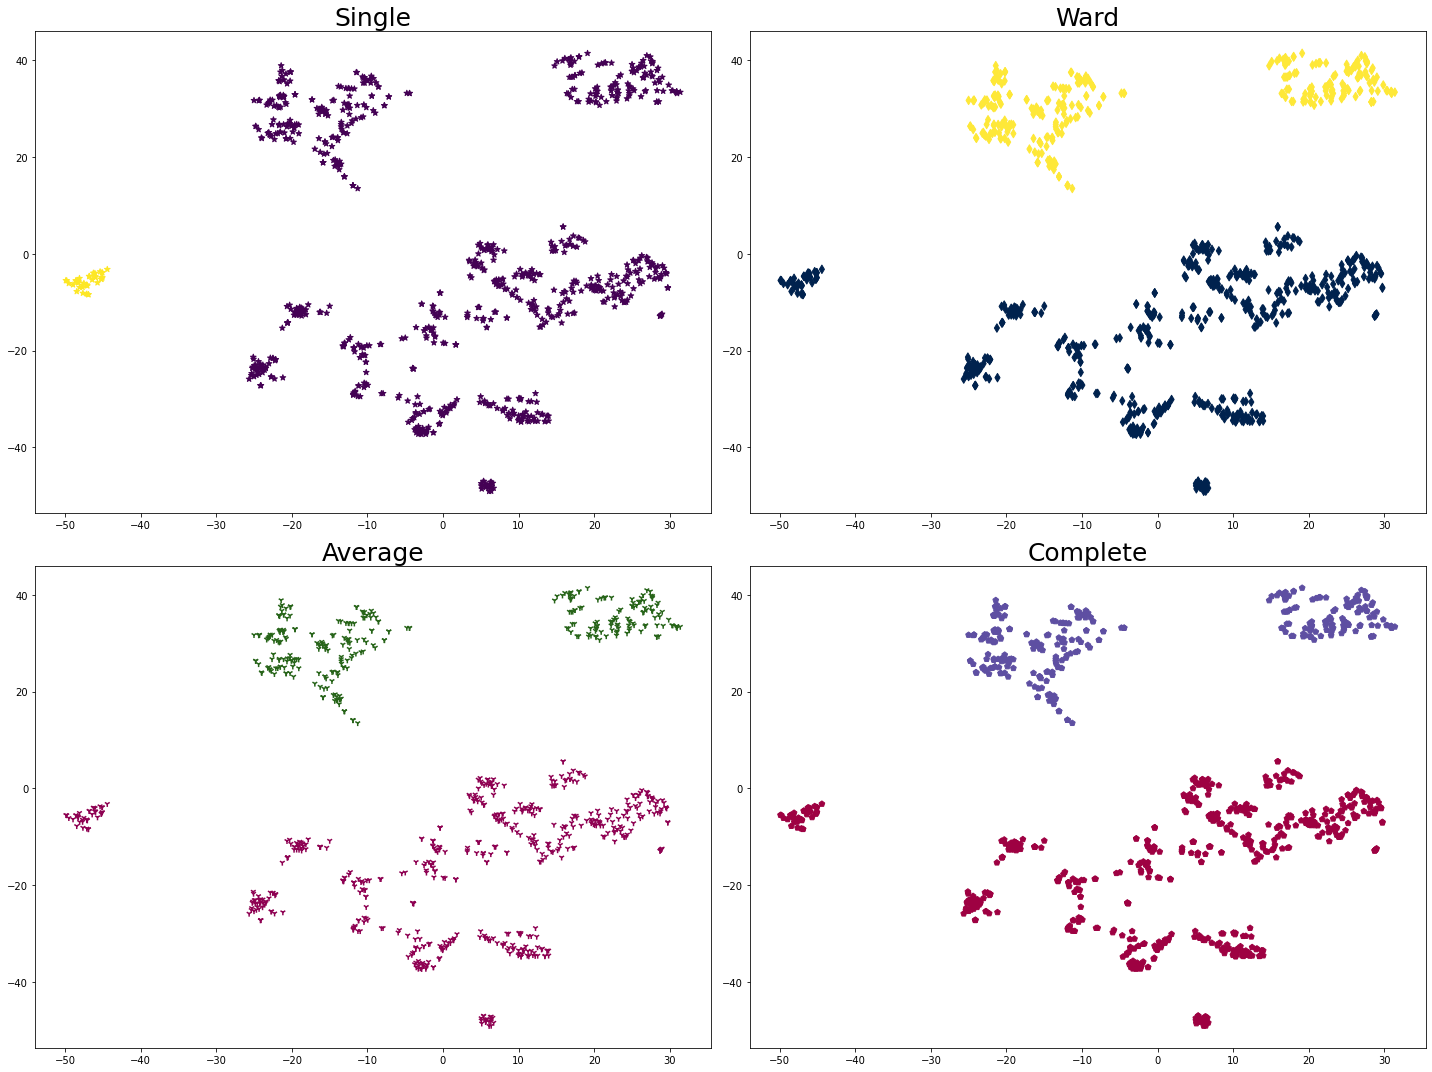

In [23]:
def agl_cluster(link):
 cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = link)
 cluster.fit(X)
 return cluster.labels_

print ("Візуалізація результатів роботи моделі для різних вхідних параметрів:")
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
plt.subplot(2, 2, 1)
result = agl_cluster('single')
plt.title("Single", fontsize = 25)
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'viridis', marker = "*")
plt.subplot(2, 2, 2)
result = agl_cluster('ward')
plt.title("Ward", fontsize = 25)
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'cividis', marker = "d")
plt.subplot(2, 2, 3)
plt.title("Average", fontsize = 25)
result = agl_cluster('average')
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'PiYG', marker = "1")
plt.subplot(2, 2, 4)
plt.title("Complete", fontsize = 25)
result = agl_cluster('complete')
plt.scatter(X[:,0],X[:,1], c = result, cmap = 'Spectral', marker = "p")
fig.tight_layout()

plt.show()

t-SNE та DBSCAN:

<Figure size 864x864 with 0 Axes>

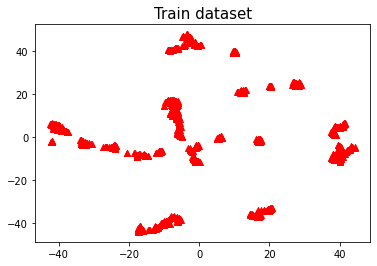

<Figure size 864x864 with 0 Axes>

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

train_full = X[:]
train_full = np.column_stack([train_full, y])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_full)

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(train_scaled)

plt.title('Train dataset', fontsize = 15)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c = 'r', marker = "^")
plt.figure(figsize = (12, 12))

При зменшенні радіуса eps к-сть кластерів зростатиме:

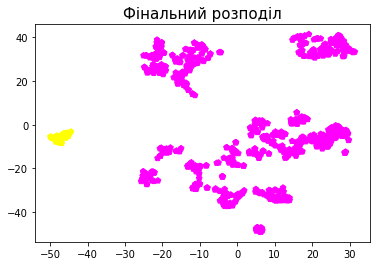

In [25]:
db = DBSCAN(eps = 21, min_samples = 2)  # при eps = 20 - 3 кластера, при eps = 19 - 4 
db.fit(X)
plt.title('Фінальний розподіл', fontsize = 15)
plt.scatter(X[:,0],X[:,1], c = db.labels_, cmap = 'spring', marker = "p")